In [4]:
### Importing Lib 

import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


### Read dataset and make one Column seperated

In [6]:
df_train = pd.read_csv('train.csv', sep='|')
df_test = pd.read_csv('test.csv', sep='|')

In [7]:
# ### Seperate The dataset value with extend the dataset
# df_train[['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications', 'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition', 'fraud']] = df_train['trustLevel|totalScanTimeInSeconds|grandTotal|lineItemVoids|scansWithoutRegistration|quantityModifications|scannedLineItemsPerSecond|valuePerSecond|lineItemVoidsPerPosition|fraud'].str.split("|",expand=True) 
# ### After Extend drop the dataset with the one columns
# df_train = df_train.drop(['trustLevel|totalScanTimeInSeconds|grandTotal|lineItemVoids|scansWithoutRegistration|quantityModifications|scannedLineItemsPerSecond|valuePerSecond|lineItemVoidsPerPosition|fraud'], axis=1)

In [8]:
df_train = pd.DataFrame(df_train)
df_test = pd.DataFrame(df_test)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   trustLevel                 1879 non-null   int64  
 1   totalScanTimeInSeconds     1879 non-null   int64  
 2   grandTotal                 1879 non-null   float64
 3   lineItemVoids              1879 non-null   int64  
 4   scansWithoutRegistration   1879 non-null   int64  
 5   quantityModifications      1879 non-null   int64  
 6   scannedLineItemsPerSecond  1879 non-null   float64
 7   valuePerSecond             1879 non-null   float64
 8   lineItemVoidsPerPosition   1879 non-null   float64
 9   fraud                      1879 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 146.9 KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498121 entries, 0 to 498120
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   trustLevel                 498121 non-null  int64  
 1   totalScanTimeInSeconds     498121 non-null  int64  
 2   grandTotal                 498121 non-null  float64
 3   lineItemVoids              498121 non-null  int64  
 4   scansWithoutRegistration   498121 non-null  int64  
 5   quantityModifications      498121 non-null  int64  
 6   scannedLineItemsPerSecond  498121 non-null  float64
 7   valuePerSecond             498121 non-null  float64
 8   lineItemVoidsPerPosition   498121 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 34.2 MB


In [11]:
df_train.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0


In [12]:
df_test.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526


In [13]:
df_train.isnull().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
fraud                        0
dtype: int64

In [14]:
df_test.isnull().sum()

trustLevel                   0
totalScanTimeInSeconds       0
grandTotal                   0
lineItemVoids                0
scansWithoutRegistration     0
quantityModifications        0
scannedLineItemsPerSecond    0
valuePerSecond               0
lineItemVoidsPerPosition     0
dtype: int64

### Preprocessing Using PCA



In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

model_features = ['trustLevel', 'totalScanTimeInSeconds', 'grandTotal', 
                  'lineItemVoids', 'scansWithoutRegistration', 'quantityModifications',
                  'scannedLineItemsPerSecond', 'valuePerSecond', 'lineItemVoidsPerPosition']

In [16]:
df_x = df_train.loc[:, model_features].values
df_y = df_train.loc[:, ['fraud']].values
dtest_x = df_test.loc[:, model_features].values


In [17]:
df_x = pd.DataFrame(df_x)
df_x

,0,1,2,3,4,5,6,7,8
0,5.0,1054.0,54.70,7.0,0.0,3.0,0.027514,0.051898,0.241379
1,3.0,108.0,27.36,5.0,2.0,4.0,0.129630,0.253333,0.357143
2,3.0,1516.0,62.16,3.0,10.0,5.0,0.008575,0.041003,0.230769
3,6.0,1791.0,92.31,8.0,4.0,4.0,0.016192,0.051541,0.275862
4,5.0,430.0,81.53,3.0,7.0,2.0,0.062791,0.189605,0.111111
...,...,...,...,...,...,...,...,...,...
1874,1.0,321.0,76.03,8.0,7.0,2.0,0.071651,0.236854,0.347826
1875,1.0,397.0,41.89,5.0,5.0,0.0,0.065491,0.105516,0.192308
1876,4.0,316.0,41.83,5.0,8.0,1.0,0.094937,0.132373,0.166667
1877,2.0,685.0,62.68,1.0,6.0,2.0,0.035036,0.091504,0.041667


In [18]:
dtest_x = pd.DataFrame(dtest_x)
dtest_x

,0,1,2,3,4,5,6,7,8
0,4.0,467.0,88.48,4.0,8.0,4.0,0.014989,0.189465,0.571429
1,3.0,1004.0,58.99,7.0,6.0,1.0,0.026892,0.058755,0.259259
2,1.0,162.0,14.00,4.0,5.0,4.0,0.006173,0.086420,4.000000
3,5.0,532.0,84.79,9.0,3.0,4.0,0.026316,0.159380,0.642857
4,5.0,890.0,42.16,4.0,0.0,0.0,0.021348,0.047371,0.210526
...,...,...,...,...,...,...,...,...,...
498116,4.0,783.0,59.10,2.0,2.0,0.0,0.012771,0.075479,0.200000
498117,1.0,278.0,98.90,9.0,5.0,4.0,0.050360,0.355755,0.642857
498118,3.0,300.0,5.41,6.0,6.0,4.0,0.030000,0.018033,0.666667
498119,2.0,1524.0,33.97,2.0,5.0,3.0,0.005906,0.022290,0.222222


In [19]:
scaler = preprocessing.MinMaxScaler()

x = scaler.fit_transform(df_x)
x_test = scaler.fit_transform(dtest_x)
y = df_y

In [20]:
len(df_y)

1879

In [21]:
len(x)


1879

In [22]:
len(x_test)

498121

Splitting Data into Training and Validation

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x, df_y, test_size=0.25, random_state=42)

print("Jumlah Data Train: ", len(X_train))
print("Jumlah Data Train: ", len(X_val))

Jumlah Data Train:  1409
Jumlah Data Train:  470


### Decompose dataset after transfor into 2 Piece of Column

In [24]:
from sklearn.decomposition import PCA

model_pca = PCA(n_components=2)
model_pca.fit(X_train)

X_train = model_pca.transform(X_train)
X_val = model_pca.transform(X_val)

# 2-D of X_train and 2-D of X_val
print(X_train[:5])
# principalDataframe = pd.DataFrame(data = prisncComponents, columns= ['PCA 1', 'PCA 2'])

[[-0.53847477 -0.21575208]
 [-0.21127218  0.25295989]
 [ 0.38318285 -0.20924678]
 [ 0.5284145  -0.48539169]
 [ 0.05425283 -0.51846548]]


### Data test not through the data splitting cause no label yet

In [25]:
print(X_val[:5])

[[-0.0459549  -0.10165303]
 [-0.03814947 -0.52335247]
 [ 0.11693794 -0.32908489]
 [-0.21580524 -0.46239781]
 [-0.47771338 -0.00650619]]


In [26]:
# principalDataframe.head(5)

In [27]:
X_train = pd.DataFrame(data=X_train, columns=['PCA 1', 'PCA 2'])
print(X_train)

         PCA 1     PCA 2
0    -0.538475 -0.215752
1    -0.211272  0.252960
2     0.383183 -0.209247
3     0.528415 -0.485392
4     0.054253 -0.518465
...        ...       ...
1404  0.129316  0.319235
1405 -0.095490 -0.511467
1406  0.511765  0.094394
1407  0.222996  0.317036
1408  0.218356 -0.176864

[1409 rows x 2 columns]


In [28]:
y_train = pd.DataFrame(data=y_train, columns=['fraud'])

In [29]:
df_finalTrain = pd.concat([X_train, y_train[['fraud']]], axis=1)

df_finalTrain

,PCA 1,PCA 2,fraud
0,-0.538475,-0.215752,0
1,-0.211272,0.252960,0
2,0.383183,-0.209247,0
3,0.528415,-0.485392,0
4,0.054253,-0.518465,0
...,...,...,...
1404,0.129316,0.319235,0
1405,-0.095490,-0.511467,0
1406,0.511765,0.094394,0
1407,0.222996,0.317036,0


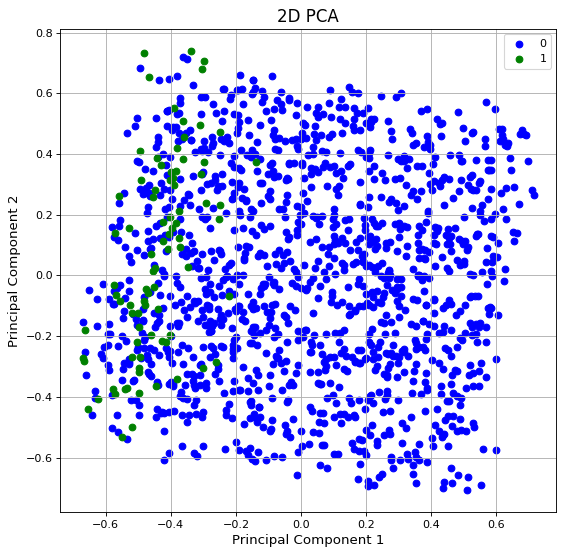

In [30]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

frauded = [0, 1]
colors = ['b', 'g']
for clas, color in zip(frauded, colors):
  plt.scatter(df_finalTrain.loc[df_finalTrain['fraud'] == clas, 'PCA 1'],
              df_finalTrain.loc[df_finalTrain['fraud'] == clas, 'PCA 2'],
              c = color)
  
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['0', '1'])
plt.grid()

In [31]:
X_val = pd.DataFrame(data=X_val, columns=['PCA 1', 'PCA 2'])

print(X_val)

        PCA 1     PCA 2
0   -0.045955 -0.101653
1   -0.038149 -0.523352
2    0.116938 -0.329085
3   -0.215805 -0.462398
4   -0.477713 -0.006506
..        ...       ...
465  0.424646 -0.092326
466  0.218368  0.493057
467 -0.407014  0.248658
468  0.368429 -0.009620
469 -0.496980 -0.374134

[470 rows x 2 columns]


In [32]:
len(y_val)

470

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#Set the K

k=5

knn_classifier = KNeighborsClassifier(n_neighbors=k)

Training & Validation with KNN

In [34]:
knn_classifier.fit(X_train, y_train)
print("KNN Training Accuracy: ", knn_classifier.score(X_train, y_train))

KNN Training Accuracy:  0.9474804826117814


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [35]:
y_pred = knn_classifier.predict(X_val)
print("KNN Validation Accuracy: ", accuracy_score(y_val, y_pred))

KNN Validation Accuracy:  0.948936170212766


Confusion Matrix dari 

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Confusion matrix, without normalization
[[445   6]
 [ 18   1]]
Normalized confusion matrix
[[0.98669623 0.01330377]
 [0.94736842 0.05263158]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       451
           1       0.14      0.05      0.08        19

    accuracy                           0.95       470
   macro avg       0.55      0.52      0.53       470
weighted avg       0.93      0.95      0.94       470



/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


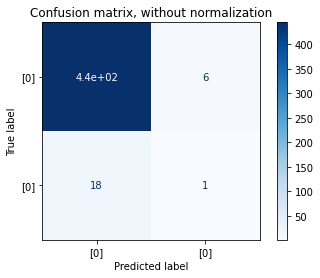

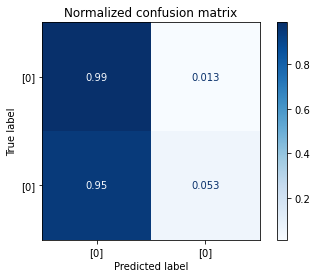

In [36]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn_classifier, X_val, y_val,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

print(classification_report(y_val, y_pred))

plt.show()

Training & Validation with Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
clf.fit(X_val, y_val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.9403832505322924


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_pred = clf.predict(X_val)
print("Akurasi", accuracy_score(y_val, y_pred))

Akurasi 0.9468085106382979


Confusion Matrix dari tebakan Validasi Random Forest

Confusion matrix, without normalization
[[445   6]
 [ 19   0]]
Normalized confusion matrix
[[0.98669623 0.01330377]
 [1.         0.        ]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       451
           1       0.00      0.00      0.00        19

    accuracy                           0.95       470
   macro avg       0.48      0.49      0.49       470
weighted avg       0.92      0.95      0.93       470



/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


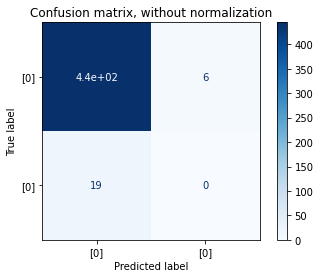

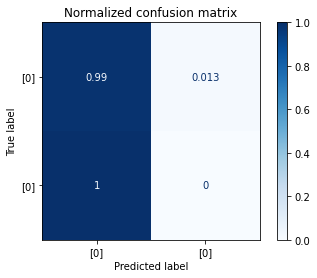

In [41]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_val, y_val,
                                 display_labels=y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

print(classification_report(y_val, y_pred))

plt.show()

Testing data test

In [42]:
from sklearn.decomposition import PCA

pca_dtest = PCA(n_components=2)
model_pcaTest = pca_dtest.fit_transform(x_test)

model_pcaTest = pd.DataFrame(data = model_pcaTest, columns= ['PCA 1', 'PCA 2'])

In [43]:
model_pcaTest.head(5)

,PCA 1,PCA 2
0,0.191787,-0.253592
1,-0.190098,0.253651
2,0.531826,0.240136
3,0.077485,-0.414329
4,-0.580381,0.038073


In [44]:
len(model_pcaTest)

498121

Predicting using KNN

Predicting data test, and Import new label[fraud] to the data test

In [45]:
test_pred = knn_classifier.predict(model_pcaTest)

In [46]:
df_test['fraud'] = test_pred

In [47]:
df_test

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
0,4,467,88.48,4,8,4,0.014989,0.189465,0.571429,0
1,3,1004,58.99,7,6,1,0.026892,0.058755,0.259259,0
2,1,162,14.00,4,5,4,0.006173,0.086420,4.000000,0
3,5,532,84.79,9,3,4,0.026316,0.159380,0.642857,0
4,5,890,42.16,4,0,0,0.021348,0.047371,0.210526,0
...,...,...,...,...,...,...,...,...,...,...
498116,4,783,59.10,2,2,0,0.012771,0.075479,0.200000,0
498117,1,278,98.90,9,5,4,0.050360,0.355755,0.642857,0
498118,3,300,5.41,6,6,4,0.030000,0.018033,0.666667,0
498119,2,1524,33.97,2,5,3,0.005906,0.022290,0.222222,0


In [48]:
df_test.to_csv('tebakan.csv')

In [49]:
df_test[df_test["fraud"]==1]

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud
10,3,714,94.29,8,7,0,0.016807,0.132059,0.666667,1
14,3,1196,83.77,11,10,0,0.004181,0.070042,2.200000,1
50,3,1087,40.46,1,10,0,0.017479,0.037222,0.052632,1
84,3,1277,26.15,0,8,0,0.008614,0.020478,0.000000,1
102,3,1077,86.33,6,10,0,0.002786,0.080158,2.000000,1
...,...,...,...,...,...,...,...,...,...,...
497950,3,1709,64.66,7,8,0,0.009362,0.037835,0.437500,1
497968,3,1191,69.48,4,6,0,0.001679,0.058338,2.000000,1
498036,3,1115,12.44,2,7,0,0.008072,0.011157,0.222222,1
498039,3,1377,87.61,6,2,0,0.007988,0.063624,0.545455,1
